<a href="https://colab.research.google.com/github/coughlinjennie/data71200su24/blob/main/class3/data71200class3lab-Jennie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

# In-Class Activity 1

In [2]:
# Import the California Housing Data from used in the HOML book, Chapter 2
# Apply one-hot encoding to the ocean_proximity value

import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()

In [8]:
from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
from sklearn.preprocessing import OneHotEncoder

housing_cat = housing['ocean_proximity'].values.reshape(-1,1)





In [9]:
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(housing_cat))


[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
print("Original features:\n", list(housing.columns), "\n")
housing_dummies = pd.get_dummies(housing)
print("Features after get_dummies:\n", list(housing_dummies.columns))

Original features:
 ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity'] 

Features after get_dummies:
 ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']


In [11]:
display(housing_dummies.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [13]:
features = housing_dummies.loc[:, 'longitude':'ocean_proximity_NEAR OCEAN']
# Extract NumPy arrays
X = features.values

y = housing_dummies['median_house_value'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (20640, 14)  y.shape: (20640,)


# In-Class Activity 2

In [32]:

from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=10, strategy='uniform')




In [33]:
#Applying this example to housing data

housing_age = housing['housing_median_age']

kb.fit(housing_age.values.reshape(-1,1))
print("bin edges: \n", kb.bin_edges_)





bin edges: 
 [array([ 1. ,  6.1, 11.2, 16.3, 21.4, 26.5, 31.6, 36.7, 41.8, 46.9, 52. ])]


# In-Class Activity 3

In [34]:
import matplotlib.pyplot as plt

In [ ]:
#Apply the following transformations to housing_median_age and median_income in the California Housing dataset

# Plot histograms and scatter matrices to explore the resultant data

# housing_median_age


In [35]:
housing_pd = housing['housing_median_age']
nbins = 10



(array([ 719., 1104., 2235., 2681., 2510., 2354., 3555., 1900., 1616.,
        1966.]),
 array([ 1. ,  6.1, 11.2, 16.3, 21.4, 26.5, 31.6, 36.7, 41.8, 46.9, 52. ]),
 <BarContainer object of 10 artists>)

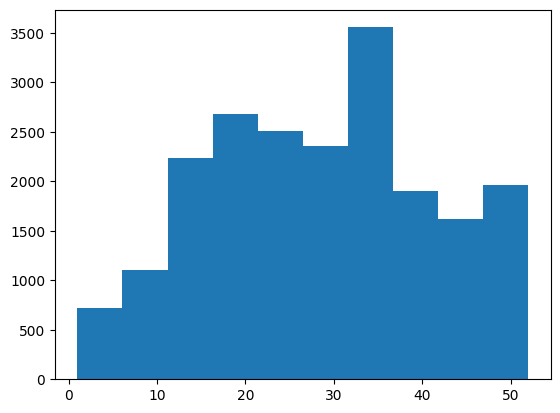

In [36]:
plt.hist(housing_pd, bins=nbins)


(array([4058., 3528., 2622., 1960., 2990., 1604., 1017.,  895.,  509.,
        1457.]),
 array([1.0000e+00, 2.7130e+02, 5.4160e+02, 8.1190e+02, 1.0822e+03,
        1.3525e+03, 1.6228e+03, 1.8931e+03, 2.1634e+03, 2.4337e+03,
        2.7040e+03]),
 <BarContainer object of 10 artists>)

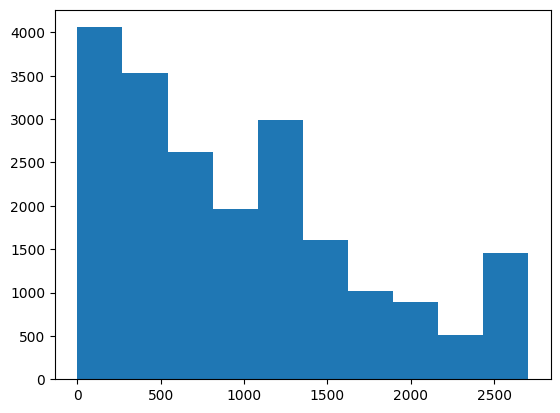

In [37]:
# Squaring (**2)
plt.hist(housing_pd**2,bins=nbins)


(array([8064., 3081., 2327., 2617.,  969.,  721.,  895.,  375.,  270.,
        1321.]),
 array([1.000000e+00, 1.406170e+04, 2.812240e+04, 4.218310e+04,
        5.624380e+04, 7.030450e+04, 8.436520e+04, 9.842590e+04,
        1.124866e+05, 1.265473e+05, 1.406080e+05]),
 <BarContainer object of 10 artists>)

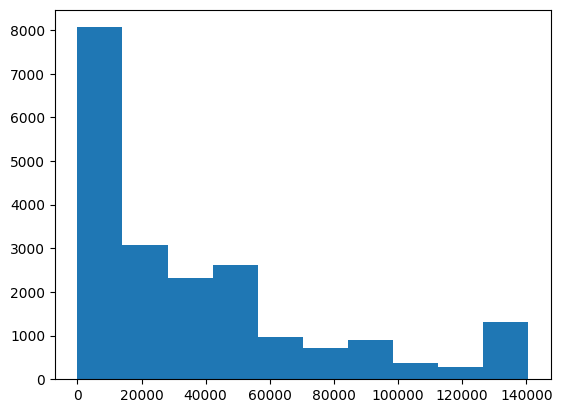

In [39]:
# Cubing (**3)
plt.hist(housing_pd**3,bins=nbins)

(array([4.000e+00, 5.800e+01, 6.200e+01, 1.910e+02, 5.790e+02, 6.750e+02,
        1.718e+03, 4.299e+03, 6.710e+03, 6.344e+03]),
 array([0.        , 0.39512437, 0.79024874, 1.18537312, 1.58049749,
        1.97562186, 2.37074623, 2.7658706 , 3.16099497, 3.55611935,
        3.95124372]),
 <BarContainer object of 10 artists>)

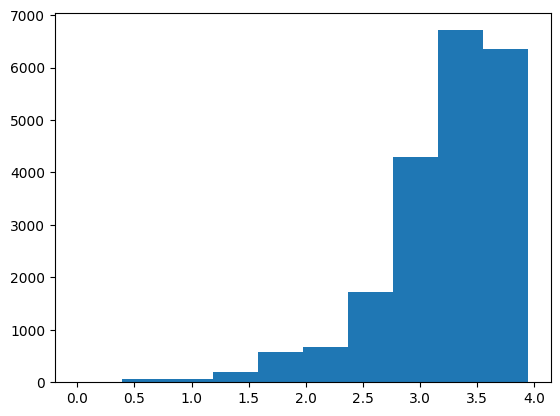

In [40]:
# np.log
plt.hist(np.log(housing_pd),bins=nbins)

(array([19183.,   136.,     0.,    48.,     0.,     0.,     0.,     0.,
            0.,  1273.]),
 array([2.71828183e+00, 3.83100800e+21, 7.66201600e+21, 1.14930240e+22,
        1.53240320e+22, 1.91550400e+22, 2.29860480e+22, 2.68170560e+22,
        3.06480640e+22, 3.44790720e+22, 3.83100800e+22]),
 <BarContainer object of 10 artists>)

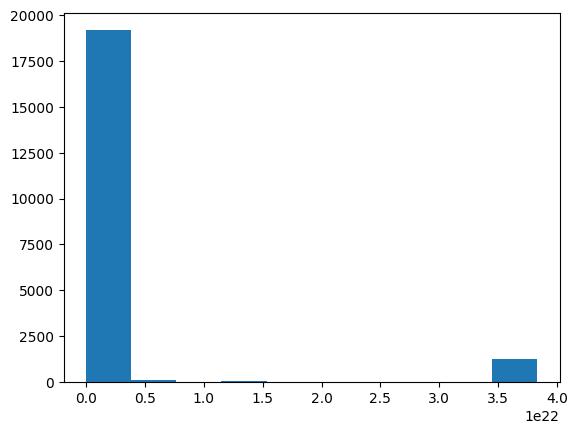

In [41]:
# np.exp
plt.hist(np.exp(housing_pd),bins=nbins)

In [42]:
# median_income
income_pd = housing['median_income']

(array([2247., 7436., 6098., 2990., 1060.,  428.,  178.,   93.,   47.,
          63.]),
 array([ 0.4999 ,  1.94992,  3.39994,  4.84996,  6.29998,  7.75   ,
         9.20002, 10.65004, 12.10006, 13.55008, 15.0001 ]),
 <BarContainer object of 10 artists>)

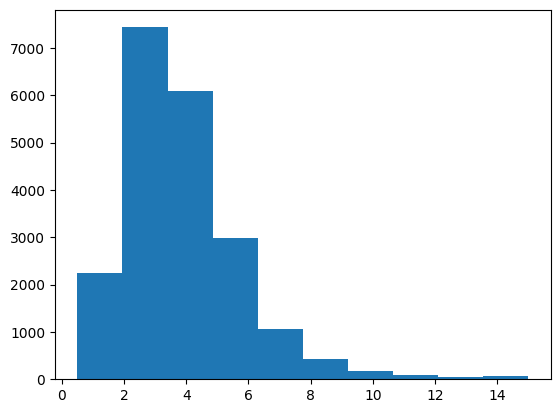

In [43]:
plt.hist(income_pd, bins=nbins)


(array([1.5538e+04, 3.6800e+03, 8.2400e+02, 2.4500e+02, 1.4700e+02,
        7.9000e+01, 3.5000e+01, 2.5000e+01, 1.0000e+01, 5.7000e+01]),
 array([  0.24990001,  22.72521001,  45.20052001,  67.67583001,
         90.15114001, 112.62645001, 135.10176001, 157.57707001,
        180.05238001, 202.52769001, 225.00300001]),
 <BarContainer object of 10 artists>)

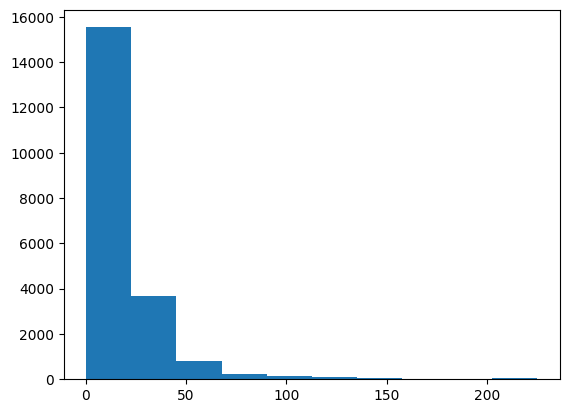

In [44]:
# Squaring (**2)
plt.hist(income_pd**2,bins=nbins)


(array([1.9417e+04, 7.7900e+02, 1.4200e+02, 1.4700e+02, 4.0000e+01,
        2.7000e+01, 1.9000e+01, 1.1000e+01, 5.0000e+00, 5.3000e+01]),
 array([1.24925015e-01, 3.37619183e+02, 6.75113440e+02, 1.01260770e+03,
        1.35010196e+03, 1.68759621e+03, 2.02509047e+03, 2.36258473e+03,
        2.70007899e+03, 3.03757324e+03, 3.37506750e+03]),
 <BarContainer object of 10 artists>)

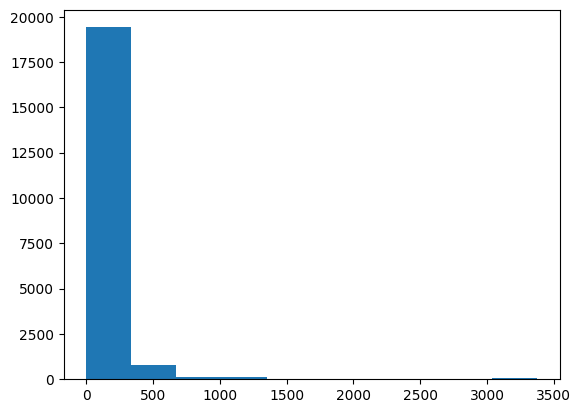

In [45]:
# Cubing (**3)
plt.hist(income_pd**3,bins=nbins)

(array([4.000e+00, 5.800e+01, 6.200e+01, 1.910e+02, 5.790e+02, 6.750e+02,
        1.718e+03, 4.299e+03, 6.710e+03, 6.344e+03]),
 array([0.        , 0.39512437, 0.79024874, 1.18537312, 1.58049749,
        1.97562186, 2.37074623, 2.7658706 , 3.16099497, 3.55611935,
        3.95124372]),
 <BarContainer object of 10 artists>)

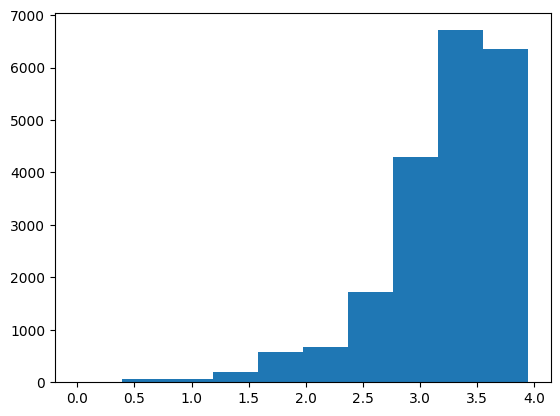

In [46]:
# np.log
plt.hist(np.log(housing_pd),bins=nbins)

(array([19183.,   136.,     0.,    48.,     0.,     0.,     0.,     0.,
            0.,  1273.]),
 array([2.71828183e+00, 3.83100800e+21, 7.66201600e+21, 1.14930240e+22,
        1.53240320e+22, 1.91550400e+22, 2.29860480e+22, 2.68170560e+22,
        3.06480640e+22, 3.44790720e+22, 3.83100800e+22]),
 <BarContainer object of 10 artists>)

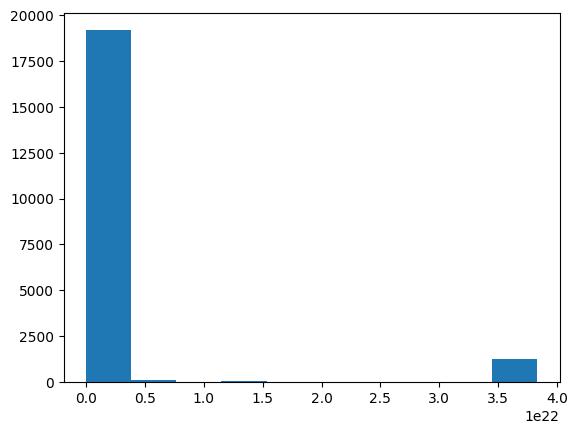

In [47]:
# np.exp
plt.hist(np.exp(housing_pd),bins=nbins)

array([[<Axes: xlabel='housing_median_age', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>],
       [<Axes: xlabel='housing_median_age', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>]],
      dtype=object)

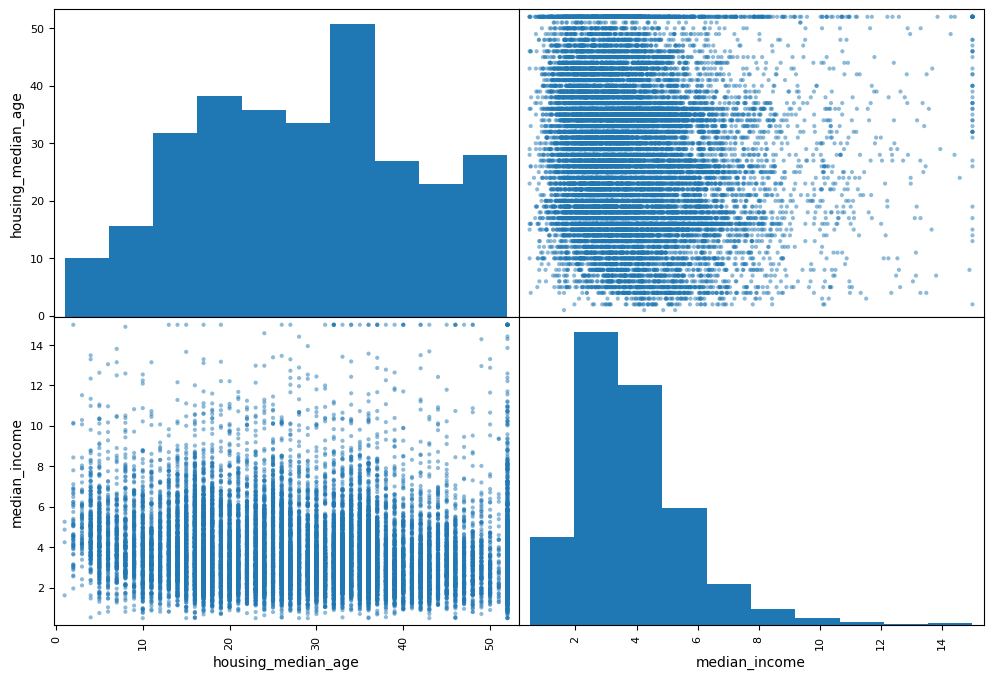

In [49]:
#scatter matrix for the original data for house_median_age and median_income
from pandas.plotting import scatter_matrix

attributes = ["housing_median_age", "median_income"]
scatter_matrix(housing[attributes], figsize=(12, 8))


array([[<Axes: xlabel='housing_median_age', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>],
       [<Axes: xlabel='housing_median_age', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>]],
      dtype=object)

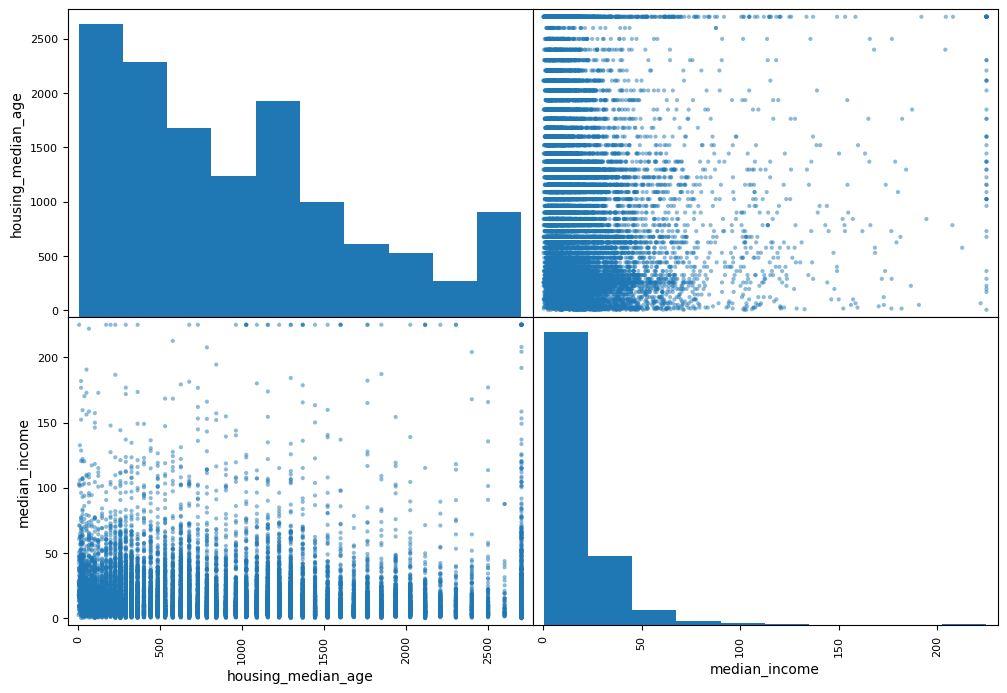

In [50]:
#scatter matrix for the squared data for house_median_age and median_income
housing["housing_median_age"] = housing["housing_median_age"]**2
housing["median_income"] = housing["median_income"]**2

#I'm not crazy about this approach because it changes the DF columns, so I need to google around and figure out a better solution before I start on my project. But it worked for the purposes of the assignment.

attributes = ["housing_median_age", "median_income"]
scatter_matrix(housing[attributes], figsize=(12, 8))

array([[<Axes: xlabel='housing_median_age', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>],
       [<Axes: xlabel='housing_median_age', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>]],
      dtype=object)

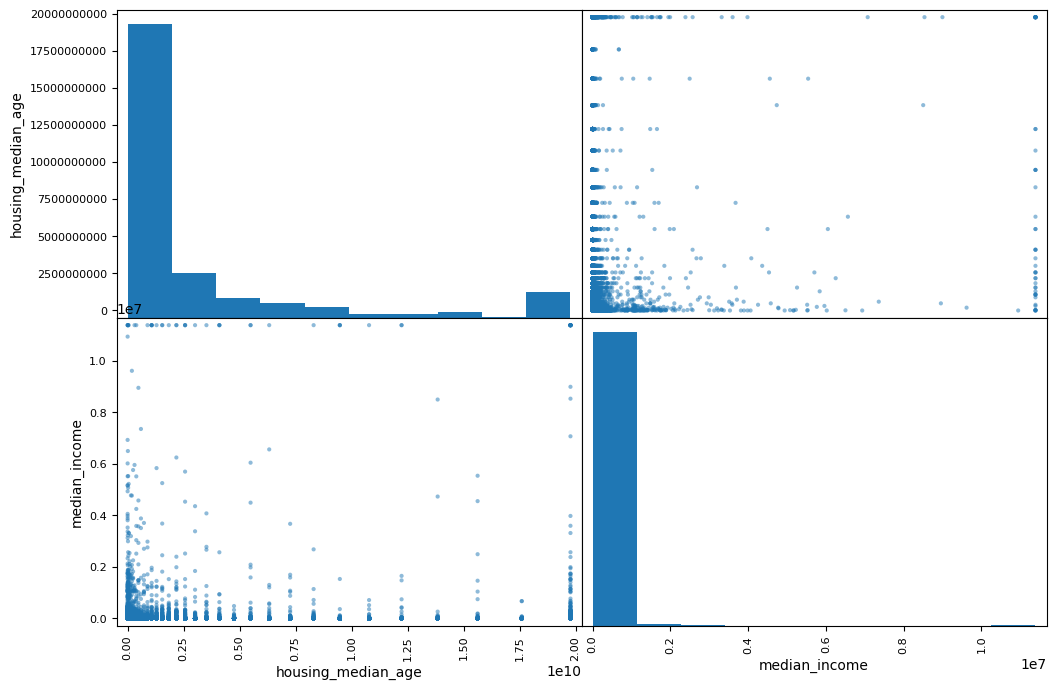

In [51]:
#scatter matrix for the cubed data for house_median_age and median_income
housing["housing_median_age"] = housing["housing_median_age"]**3
housing["median_income"] = housing["median_income"]**3

attributes = ["housing_median_age", "median_income"]
scatter_matrix(housing[attributes], figsize=(12, 8))